# Line Detection

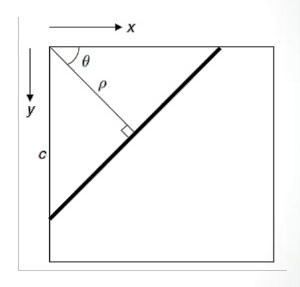

In [1]:
from IPython.display import Image
Image(filename='images/hough-transform.jpg')

<pre>
A line can be represented as y = mx+c or in parametric form, as p = x*cos0 + y*sin0
where 'p' is the perpendicular distance from origin to the line, and 
      '0' is the angle formed by this perpendicular line and horizontal axis measured in counter-clockwise.
      
So if line is passing below the origin, it will have a +ve rho and angle less than 180.
If it is above the origin, instead of taking angle greater than 180, angle is taken less than 180, & rho is taken -ve.
Any vertical line will have 0 degree and horizontal lines will have 90 degree.      
</pre>

## Hough Lines

In [2]:
# cv2.HoughLines(binarized/thresholded image, 𝜌 accuracy, 𝜃 accuracy, threshold)
# threshold here is the minimum vote for it to be considered a line

In [3]:
import cv2
import numpy as np

image = cv2.imread('images/soduku.jpg')

# Grayscale and Canny Edges extracted
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

cv2.imshow("Edges", edges)
cv2.waitKey(0)

# Run HoughLines using a rho accuracy of 1 pixel
# theta accuracy of np.pi / 180 which is 1 degree
# Our line threshold is set to 225 (number of points on line) => lesser value gives more no. of lines
lines = cv2.HoughLines(edges, 1, np.pi/180, 225)

# We iterate through each line and convert it to the format required by cv.lines (i.e. requiring end points)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

cv2.imshow('Hough Lines', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Probabilistic Hough Lines

In [4]:
# cv2.HoughLinesP(binarized image, 𝜌 accuracy, 𝜃 accuracy, threshold, minimum line length, max line gap)
# Idea is that it takes only a random subset of pts. sufficient enough for line detection
# Also returns the start & end pts. of the line unlike the cv2.HoughLines() function

In [5]:
import cv2
import numpy as np

# Grayscale and Canny Edges extracted
image = cv2.imread('images/soduku.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

cv2.imshow("Edges", edges)
cv2.waitKey(0)

# Run HoughLinesP using a rho accuracy of 1 pixel
# theta accuracy of np.pi / 180 which is 1 degree
# However, we specific a minimum vote (pts along line) of 150
# and Min line length of 5 pixels and max gap between lines of 10 pixels
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 150, 5, 10)
print(lines.shape)

for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(image, (x1, y1), (x2, y2),(0, 255, 0), 3)

cv2.imshow('Probabilistic Hough Lines', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

(273, 1, 4)


# Circle Detection

A circle is represented mathematically as (x-x_center)^2 + (y - y_center)^2 = r^2 where (x_center, y_center) is the center of the circle, and r is the radius of the circle.

## Hough Circles

In [6]:
# cv2.HoughCircles(image, method, dp, MinDist, param1, param2, minRadius, MaxRadius)

# Method - currently only cv2.HOUGH_GRADIENT available
# dp - Inverse ratio of accumulator resolution
# MinDist - the minimum distance between the center of detected circles
# param1 - Gradient value used in the edge detection
# param2 - Accumulator threshold for HOUGH_GRADIENT method (lower allows more circles to be detected (false positives))
# minRadius - limits the smallest circle to this size (via radius)
# MaxRadius - similarly sets the limit for the largest circles

In [7]:
import cv2
import numpy as np
import cv2

image = cv2.imread('images/bottlecaps.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.5, 10, param1=100, param2=100, minRadius=25, maxRadius=50)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(image,(i[0], i[1]), i[2], (255, 0, 0), 2)
    
    # draw the center of the circle
    cv2.circle(image, (i[0], i[1]), 2, (0, 255, 0), 5)

cv2.imshow('Detected Circles', image)
cv2.waitKey(0)
cv2.destroyAllWindows()